In [1]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt

In [2]:
reactor = "MSDR"

In [8]:
beta_directory = "./" + reactor + "/OPUS/csv/"

print("Searching directory for .csv files...")
csv_names = []
for root, dirs, files in os.walk(beta_directory):
    for file in files:
        if file.startswith("off"):
            #print(os.path.join(root, file))
            csv_names.append(os.path.join(root, file))

csv_names = natsorted(csv_names)
csv_names

Searching directory for .csv files...


['./MSDR/OPUS/csv/off_gas_comp_0.csv',
 './MSDR/OPUS/csv/off_gas_comp_5.csv',
 './MSDR/OPUS/csv/off_gas_comp_10.csv',
 './MSDR/OPUS/csv/off_gas_comp_12.csv',
 './MSDR/OPUS/csv/off_gas_comp_15.csv',
 './MSDR/OPUS/csv/off_gas_comp_20.csv',
 './MSDR/OPUS/csv/off_gas_comp_40.csv',
 './MSDR/OPUS/csv/off_gas_comp_60.csv',
 './MSDR/OPUS/csv/off_gas_comp_80.csv',
 './MSDR/OPUS/csv/off_gas_comp_100.csv']

In [9]:
# opus_csv_directory = "./" + reactor + "/OPUS/csv/"

# for z in ["salt", "off", "solid"]:
#     print("Searching directory for composition csv files...")
#     csv_names = []
#     for root, dirs, files in os.walk(opus_csv_directory):
#         for file in files:
#             if file.startswith(z):
#                 csv_names.append(os.path.join(root, file))

#     csv_names = natsorted(csv_names)
#     print(csv_names)

In [10]:
df0 = pd.DataFrame()
df5 = pd.DataFrame()
df10 = pd.DataFrame()
df12 = pd.DataFrame()
df15 = pd.DataFrame()
df20 = pd.DataFrame()
df40 = pd.DataFrame()
df60 = pd.DataFrame()
df80 = pd.DataFrame()
df100 = pd.DataFrame()

for i in range(0, len(csv_names)):
    df = pd.read_csv(csv_names[i])
    if i == 0:
        df0 = df.copy()
    if i == 1:
        df5 = df.copy()
    if i == 2:
        df10 = df.copy()
    if i == 3:
        df12 = df.copy()
    if i == 4:
        df15 = df.copy()
    if i == 5:
        df20 = df.copy()
    if i == 6:
        df40 = df.copy()
    if i == 7:
        df60 = df.copy()
    if i == 8:
        df80 = df.copy()
    if i == 9:
        df100 = df.copy()

In [11]:
df0

time         xe134         xe136         cs133         cs135         xe131  \
0     0  1.381104e-16  1.401597e-16  1.370547e-16  1.391040e-16  1.350054e-16   
1   100  1.594107e+03  1.463697e+03  1.148229e+03  5.948559e+02  5.471631e+02   
2   415  7.302960e+03  6.725430e+03  5.658552e+03  2.786427e+03  2.624346e+03   
3   730  1.297269e+04  1.197909e+04  1.016577e+04  5.008986e+03  4.739472e+03   

           kr86          kr84          kr83         xe132  ...         yb170  \
0  8.861670e-17  8.650530e-17  8.551170e-17  1.359990e-16  ...  0.000000e+00   
1  2.511945e+02  1.258767e+02  6.650910e+01  5.629986e+01  ...  4.156974e-33   
2  1.119663e+03  5.635575e+02  2.988873e+02  2.704455e+02  ...  3.273912e-33   
3  1.944351e+03  9.818010e+02  5.223231e+02  4.989735e+02  ...  3.273912e-33   

          tl206         hg206         rn218         th226         ra222  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  1.861137e-33  7.793550e-35  3.606768e-35  8.576010e-43  1.661796e-44   
2  1.209708e-33  5.709474e-35  3.542184e-35  0.000000e+00  0.000000e+00   
3  1.209087e-33  5.707611e-35  3.540942e-35  0.000000e+00  0.000000e+00   

          fr222          i123      subtotal         total  
0  0.000000e+00  0.000000e+00  5.305203e-14  5.305203e-14  
1  2.801952e-47  1.099791e-53  6.007554e+03  6.007554e+03  
2  0.000000e+00  3.277638e-50  2.767176e+04  2.767176e+04  
3  0.000000e+00  2.160459e-49  4.930119e+04  4.930119e+04  

[4 rows x 459 columns]

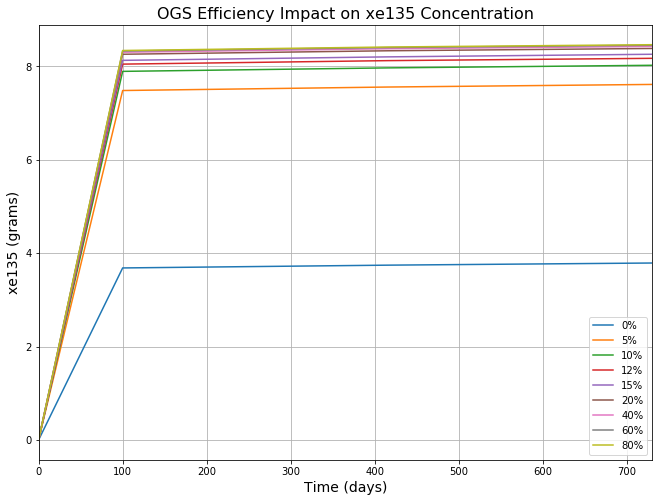

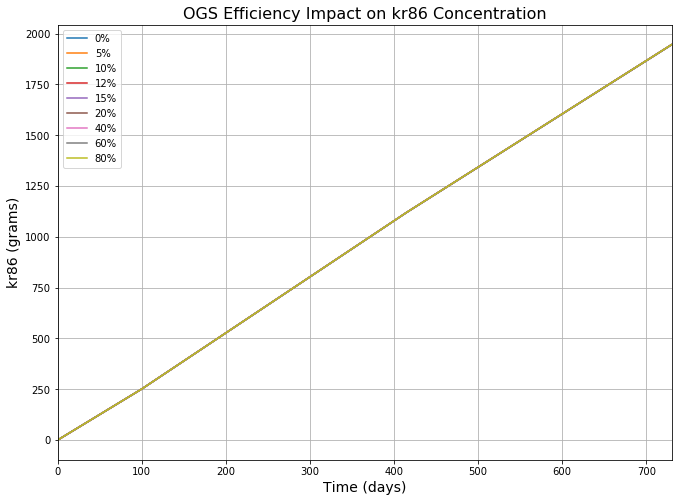

In [12]:
isotopes_plot = ["xe135", "kr86"]

for z in isotopes_plot:
    ax = df0.plot(x="time", y=z, figsize=(11,8), grid=True)
    df5.plot(x="time", y=z, ax = ax)
    df10.plot(x="time", y=z, ax = ax)
    df15.plot(x="time", y=z, ax = ax)
    df20.plot(x="time", y=z, ax = ax)
    df40.plot(x="time", y=z, ax = ax)
    df60.plot(x="time", y=z, ax = ax)
    df80.plot(x="time", y=z, ax = ax)
    df100.plot(x="time", y=z, ax = ax)
    ax.grid(True)
    ax.set_ylabel(z + " (grams)", fontsize=14)
    ax.set_xlabel("Time (days)", fontsize=14)
    ax.set_title("OGS Efficiency Impact on {} Concentration".format(z), fontsize=16)
    ax.legend(["0%", "5%", "10%", "12%", "15%", "20%", "40%", "60%", "80%", "100%"])
    plt.savefig(("./" + reactor + "/OPUS/" + z + "_OFF_eff_impact.png"), 
                    format='png', dpi=1200)